In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
# Reduced cess-esp data

import nltk
from nltk import *
from nltk.tag import hmm


s_tagged = nltk.corpus.cess_esp.tagged_sents()

list1 = []
list2 = []

for sent in s_tagged:
    for word, tag in sent:
        n_tag = re.findall(r'^v[a-z]{,2}|^F[a-z]{,2}|^d[a-z]{,1}|^n[a-z]{,1}|^a[a-z]{,1}|^s[a-z]{,1}|^Z[a-z]{,1}|^W[a-z]{,1}|^p[a-z]{,1}', tag)
        listToStr = ' '.join(map(str, n_tag)) 
        list2.append((word,listToStr))
    list1.append(list2)
    list2 = []
    
cut = int(0.9 * len(list1))
training_data = list1[:cut]
test_data = list1[cut:]
text == training_data + test_data                      #True
print(len(training_data) / len(test_data))

9.0


In [11]:
from random import shuffle

portion = int(0.1 * len(list1))

train1K = list1[:portion]
train2K = list1[portion:portion*2]
train3K = list1[portion*2:portion*3]
train4K = list1[portion*3:portion*4]
train5K = list1[portion*4:portion*5]
train6K = list1[portion*5:portion*6]
train7K = list1[portion*6:portion*7]
train8K = list1[portion*7:portion*8]
train9K = list1[portion*8:portion*9]
train10K = list1[portion*9:portion*10]

total_list = train1K + train2K + train3K + train4K + train5K + train6K + train7K + train8K + train9K + train10K
len(total_list)

shuffle(total_list)

train_list = []
test_list = []
allof = []

def hmm(training_data, test_data):
    hmm_tagger = nltk.HiddenMarkovModelTagger.train(training_data)
    return hmm_tagger.evaluate(test_data)
    
for flag in range(10):
    for i in range(10):
        if i == flag:
            test_list = total_list[portion*(i):portion*(i+1)]
        else:
            train_list.append(total_list[portion*(i):portion*(i+1)])
    train_list = train_list[0] + train_list[1] + train_list[2] + train_list[3] + train_list[4] + train_list[5] + train_list[6] + train_list[7] + train_list[8]
    allof.append(hmm(train_list, test_list))
    train_list.clear()
    test_list.clear()

In [35]:
print("Reduced dataset accuracy\n")
for i in allof:
    print(i)

Reduced dataset accuracy

0.9323499491353001
0.9278691864907544
0.9291930804770603
0.9253144247192174
0.9270926618553442
0.9301611665387567
0.930277836245001
0.9279080749252322
0.9285017206841646
0.923659793814433


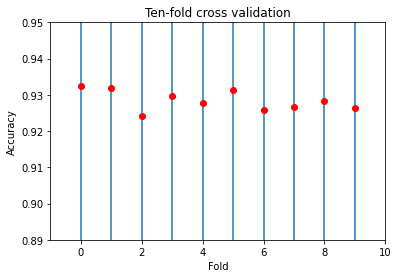

In [25]:
# Hidden Markov Model for reduced data set
import matplotlib.pyplot as plt
x=[i for i in range(10)]
y=allof
plt.axis([-1, 10, 0.89, 0.95])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=allof,linestyle='None')
plt.show()